##  Hirarchical Clustering
 Introduction to Hirarchical Clustering

Dendrogram 

Types of Hirarchical Clustering:Aaggomerative and Divisive 

Cluster Linkage 

https://builtin.com/machine-learning/agglomerative-clustering

https://www.datacamp.com/tutorial/introduction-hierarchical-clustering-python

https://www.kaggle.com/datasets/itssuru/loan-data 


https://www.kaggle.com/code/ddosad/intro-to-hierarchical-clustering

 Mall Customers Hierarchical clustering
 https://www.kaggle.com/code/devahuja2808/hierarchical-clustering


https://www.kaggle.com/code/hellbuoy/online-retail-k-means-hierarchical-clustering

https://www.kaggle.com/code/tanmay111999/clustering-pca-k-means-dbscan-hierarchical#K-Means-Clustering

### Hierarchical Clustering

**Introduction to Hierarchical Clustering**

Hierarchical clustering is an unsupervised machine learning technique used to group similar objects into clusters based on their feature similarities. It creates a hierarchy of clusters that can be represented in a tree-like structure called a dendrogram. This method is useful for understanding the data structure and identifying natural groupings within the dataset.

---

### Dendrogram

A dendrogram is a visual representation of the hierarchy of clusters produced by hierarchical clustering. It illustrates how clusters are formed by merging or splitting from the root node down to the individual data points. The y-axis typically represents the distance or dissimilarity between clusters:

- **Height of the branches**: Indicates the distance at which clusters are merged.
- **Leaves**: Represent the individual data points.

Dendrograms allow you to see the arrangement of clusters at various levels of granularity, making it easy to choose the optimal number of clusters.

---

### Types of Hierarchical Clustering

1. **Agglomerative Hierarchical Clustering**:
   - This is the most common type of hierarchical clustering.
   - It follows a "bottom-up" approach, starting with each data point as a single cluster and progressively merging them based on their similarity.
   - The algorithm continues until all points are merged into a single cluster or until a stopping criterion is reached.

   Steps:
   - Start with \(N\) clusters (each data point).
   - Find the two closest clusters and merge them.
   - Update the distances between the new cluster and the remaining clusters.
   - Repeat until one cluster remains or a desired number of clusters is reached.

2. **Divisive Hierarchical Clustering**:
   - This is a "top-down" approach, starting with a single cluster containing all data points and progressively splitting it into smaller clusters.
   - It is less common than agglomerative clustering and generally more computationally intensive.

   Steps:
   - Start with a single cluster containing all data points.
   - Identify the cluster to split based on dissimilarity.
   - Split the cluster into smaller clusters.
   - Repeat until each data point is its own cluster or a desired number of clusters is reached.

---

### Cluster Linkage

Cluster linkage defines how the distance between clusters is calculated during hierarchical clustering. The choice of linkage affects the shape and size of the resulting clusters. Common types of linkage include:

1. **Single Linkage**:
   - Measures the distance between the closest points of two clusters.
   - Tends to produce long, "chain-like" clusters.

2. **Complete Linkage**:
   - Measures the distance between the farthest points of two clusters.
   - Produces more compact clusters.

3. **Average Linkage**:
   - Computes the average distance between all pairs of points in the two clusters.
   - A balance between single and complete linkage.

4. **Ward’s Linkage**:
   - Minimizes the total within-cluster variance when merging clusters.
   - Tends to produce clusters of similar sizes.

---

### Example Implementation of Hierarchical Clustering

Here’s how to implement hierarchical clustering using Python's `scikit-learn` and visualize the dendrogram using `scipy`:


### Class notes
[notes hierarchical](<../ml2/29 June to 01 July/ML23 Hierarchical clustering.pdf>)
Hierarchical clustering 
- Agglomerative:(combining) start with individual data points and merge them into clusters.

- Steps 
    - each point is a cluster in its own right
    - find the closest point and create a new cluster
    - keep doing this until all points are in one cluster

- how you are combining?
    - euclidean distance (most common)
    - Manhattan distance (city block)
    - cosine similarity (for text data) --> to calculate distance between two vectors(categorical/string data)


- To determine K
    - business team 
    - threshold on Euclidean distance (can be tricky)
    - we take longest vertical line of dendrogram where non of the horizontal line is passing (tricky)


### K means clustering vs Hierarchical clustering
- K means clustering works very very well for the large/huge data.
- Hierarchical clustering works very very well for the small data.
- k means -> numerical data and hierarchical varity of data

- K --> deciding K in K means -->using elbow.
    Hierarchial --> No centroid

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets
data = datasets.load_iris()
X = data.data
y = data.target

In [3]:
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [9]:
#pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_scaled = pca.fit_transform(X_scaled)

In [10]:
pca_scaled

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

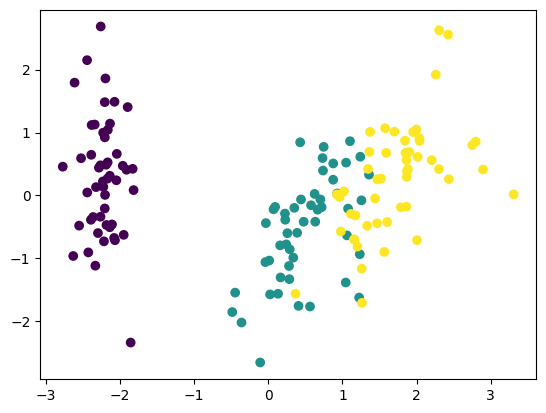

In [9]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=y)

Text(0, 0.5, 'Euclidean distance')

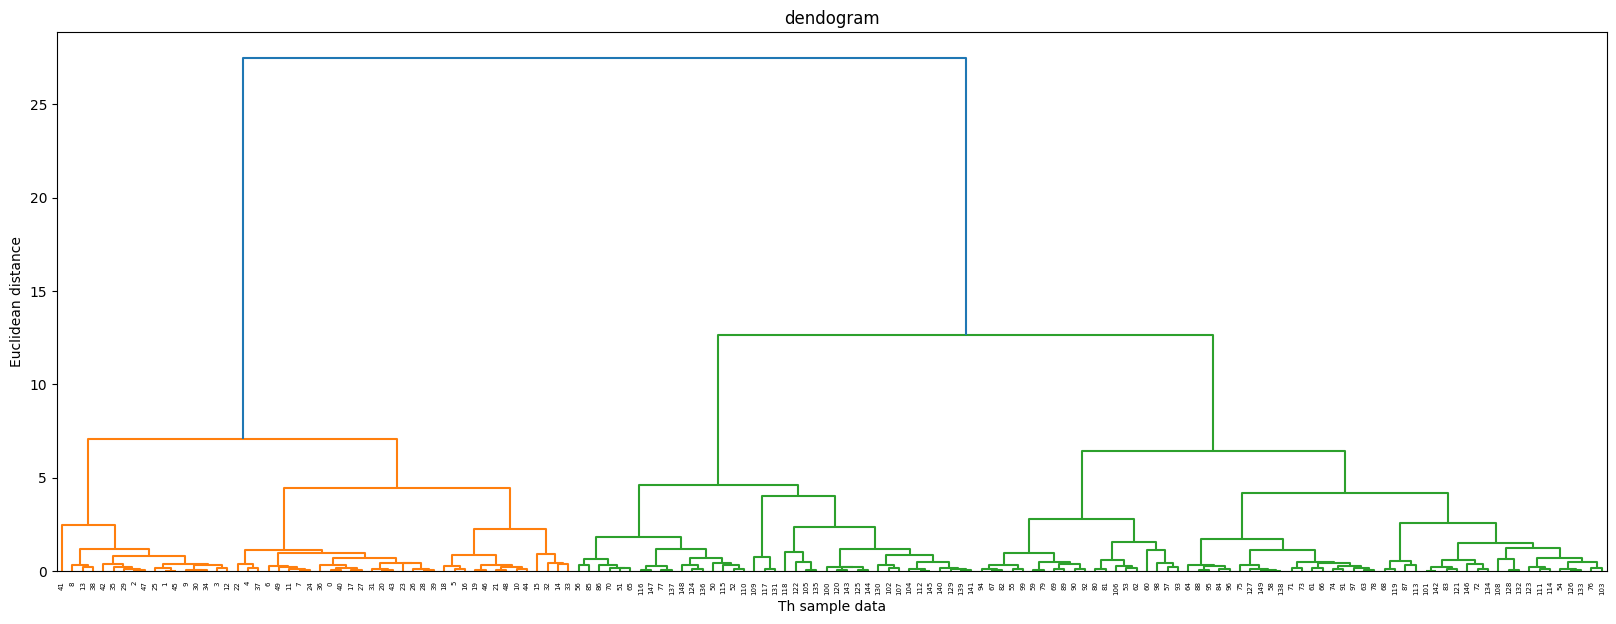

In [11]:
#agglomerative clustering >> make dendrogram
import scipy.cluster.hierarchy as sc

plt.figure(figsize = (20, 7))
plt.title("dendogram")

sc.dendrogram(sc.linkage(pca_scaled, method = "ward"))
plt.xlabel("Th sample data")
plt.ylabel("Euclidean distance")

In [11]:
from sklearn.cluster import AgglomerativeClustering
# cluster = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage = "ward")  it show error because ward only use euclidenan so 
# not need to specify affinity="euclidean" in ward linkage

cluster = AgglomerativeClustering(n_clusters=2, linkage = "ward")

In [12]:
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [13]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

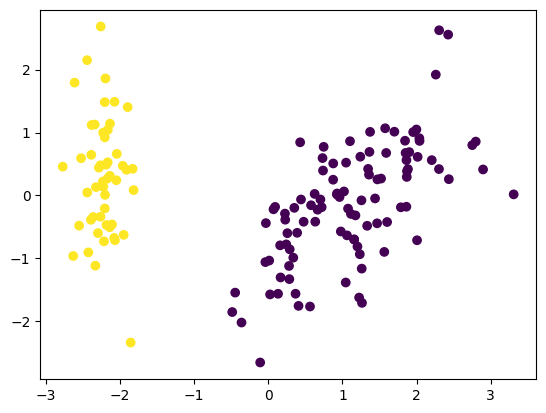

In [14]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c = cluster.labels_)

In [15]:
from sklearn.metrics import silhouette_score
silhouette_coeff = []
for k in range(2, 10):
    # agglo = AgglomerativeClustering(n_clusters=k, affinity = "euclidean", linkage = "ward")
    agglo = AgglomerativeClustering(n_clusters=k, linkage = "ward")
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled, agglo.labels_)
    silhouette_coeff.append(score)

In [16]:
silhouette_coeff

[np.float64(0.5770346019475988),
 np.float64(0.4466890410285909),
 np.float64(0.4006363159855973),
 np.float64(0.33058726295230545),
 np.float64(0.31485480100512825),
 np.float64(0.316969830299128),
 np.float64(0.310946529007258),
 np.float64(0.31143422475471655)]

## EXAMPLE 2 Implementations

### implment

In [13]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage = "ward")

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

The error you're encountering is because the `AgglomerativeClustering` class from `sklearn.cluster` does not have an `affinity` parameter when you're using the `linkage="ward"` option.

### Reason:
- The `ward` linkage method **only supports `euclidean` distance** as the affinity measure. So, the `affinity` parameter becomes irrelevant when you're using `linkage="ward"`, and passing `affinity="euclidean"` causes the error because it's unnecessary and unsupported when `linkage="ward"` is chosen.

### Solution:
If you want to use the **ward linkage**, you should **remove** the `affinity` argument because it’s not required. Here's how you can correct the code:

```python
from sklearn.cluster import AgglomerativeClustering

# Correct code with linkage="ward"
cluster = AgglomerativeClustering(n_clusters=2, linkage="ward")

# You can then fit and predict clusters on your data, for example:
# cluster_labels = cluster.fit_predict(X)  # where X is your data matrix
```

### Explanation:
- `linkage="ward"` is used to minimize the variance of the clusters, and it implicitly uses `euclidean` distance, so you don't need to specify it explicitly.
- The `affinity` parameter is only used when the `linkage` is set to `'average'`, `'complete'`, or `'single'`, where you can specify other distance metrics (like `"euclidean"`, `"manhattan"`, etc.).

### Example of `AgglomerativeClustering` with different linkage:

1. **Ward linkage (default)** — only `euclidean` affinity is allowed:

```python
cluster = AgglomerativeClustering(n_clusters=2, linkage="ward")
```

2. **Other linkages (average, complete, or single)** — you can specify the `affinity` argument for different distance metrics:

```python
# Using "average" linkage and specifying "manhattan" as affinity
cluster = AgglomerativeClustering(n_clusters=2, linkage="average", affinity="manhattan")
```

### Conclusion:
- **Ward linkage**: Does not require the `affinity` parameter.
- If you want to use **different distance metrics**, use `linkage="average"`, `linkage="complete"`, or `linkage="single"` and specify the `affinity` parameter.

In [22]:
from sklearn.cluster import AgglomerativeClustering

# Correct code with linkage="ward"
cluster = AgglomerativeClustering(n_clusters=2, linkage="ward")

# You can then fit and predict clusters on your data, for example:
# cluster_labels = cluster.fit_predict(X)  # where X is your data matrix


If you want to include the `affinity` parameter and use a distance metric other than `euclidean`, you can do so by using one of the following linkages:

- `linkage="average"`
- `linkage="complete"`
- `linkage="single"`

These linkages allow you to specify the `affinity` parameter, where you can use different distance metrics, such as `"euclidean"`, `"manhattan"`, `"cosine"`, or `"precomputed"` (for using a precomputed distance matrix).

### Correct Usage:

If you want to specify an `affinity` other than `euclidean`, you can do it like this:

### Example with `linkage="average"` and `affinity="manhattan"`:

```python
from sklearn.cluster import AgglomerativeClustering

# Using average linkage with affinity as "manhattan"
cluster = AgglomerativeClustering(n_clusters=2, linkage="average", affinity="manhattan")

# Fit the model and predict clusters
# cluster_labels = cluster.fit_predict(X)  # where X is your data matrix
```

### Example with `linkage="complete"` and `affinity="cosine"`:

```python
from sklearn.cluster import AgglomerativeClustering

# Using complete linkage with affinity as "cosine"
cluster = AgglomerativeClustering(n_clusters=2, linkage="complete", affinity="cosine")

# Fit the model and predict clusters
# cluster_labels = cluster.fit_predict(X)  # where X is your data matrix
```

### Affinity Options:
- **"euclidean"**: Euclidean distance (used by default in `ward` linkage).
- **"manhattan"**: Manhattan (or city block) distance.
- **"cosine"**: Cosine distance (commonly used for text data or vector similarity).
- **"precomputed"**: For precomputed distance matrices (you provide a distance matrix instead of raw data).

### Notes:
- **Ward linkage** **cannot** use `affinity` other than `euclidean` because it specifically uses the squared Euclidean distance to minimize variance within clusters.
- **Other linkages** such as `average`, `complete`, or `single` can use any of the supported affinity measures (`euclidean`, `manhattan`, `cosine`, etc.).

### Example with a custom distance matrix:

If you choose `affinity="precomputed"`, you need to provide a distance matrix rather than raw data:

```python
import numpy as np
from sklearn.cluster import AgglomerativeClustering

# Example of precomputed distance matrix (this is just a simple example)
X_dist = np.array([[0, 1, 2], [1, 0, 3], [2, 3, 0]])

# Using precomputed distance matrix
cluster = AgglomerativeClustering(n_clusters=2, affinity="precomputed", linkage="average")

# Fit the model using the distance matrix
cluster_labels = cluster.fit_predict(X_dist)
```

In this case, `X_dist` is the precomputed distance matrix between points.

### Summary:
- If you want to use `affinity` with `AgglomerativeClustering`, **avoid `ward` linkage**, and instead use `average`, `complete`, or `single` linkages.
- You can specify `affinity` like `"euclidean"`, `"manhattan"`, `"cosine"`, or `"precomputed"`.
- For `ward` linkage, the `affinity` parameter is fixed to `euclidean` and cannot be changed.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Using average linkage with affinity as "manhattan"
cluster = AgglomerativeClustering(n_clusters=2, linkage="average", affinity="manhattan")

# Fit the model and predict clusters
# cluster_labels = cluster.fit_predict(X)  # where X is your data matrix


## Example 2 

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Generate synthetic dataset
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

In [ ]:
# Step 1: Create a Dendrogram
plt.figure(figsize=(12, 6))
linked = linkage(X, method='ward')  # Using Ward's linkage
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Step 2: Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_agg = agg_clustering.fit_predict(X)

In [ ]:
# Step 3: Visualization of Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_agg, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()



### Explanation of the Code

1. **Import Libraries**: The necessary libraries for data generation, clustering, and visualization are imported.

2. **Generate Synthetic Dataset**: A synthetic dataset with 300 samples and 4 centers is created using `make_blobs`.

3. **Dendrogram**:
   - The `linkage` function from `scipy` computes the linkage matrix using Ward’s method.
   - The `dendrogram` function visualizes the hierarchy of clusters.

4. **Agglomerative Clustering**: The `AgglomerativeClustering` class from `scikit-learn` is used to fit the model with the desired number of clusters.

5. **Cluster Visualization**: A scatter plot is created to show the resulting clusters.

### Conclusion

Hierarchical clustering is a versatile method for exploring the structure of data. By using dendrograms and understanding the types of hierarchical clustering and linkage methods, you can effectively identify and analyze clusters in your datasets.

# OPTIONAL LEARNING

### **Linkage** and **Affinity** are key concepts in hierarchical clustering, particularly in the context of **Agglomerative Clustering**. They define how the distance between clusters is computed and how the clusters are merged.

### **1. Linkage**:
In the context of Agglomerative Clustering, **linkage** determines the method used to calculate the distance between clusters during the merging process. It defines how the distance between two clusters (groups of data points) is calculated as we combine them into a hierarchical structure.

#### Linkage Types:
- **Ward Linkage** (Default in `sklearn`):
  - **Objective**: Minimize the variance within the clusters.
  - **How it works**: It merges the clusters that result in the least increase in total within-cluster variance. This method uses squared Euclidean distance.
  - **Note**: Ward linkage is only compatible with `euclidean` affinity (distance metric).
  
  - **Use case**: Best used when you want compact, spherical clusters. It’s a good general-purpose choice for clustering.

  Example:
  ```python
  AgglomerativeClustering(linkage="ward", n_clusters=3)
  ```

- **Average Linkage**:
  - **Objective**: The distance between two clusters is the average of the distances between all points in one cluster and all points in the other cluster.
  - **How it works**: It computes the average distance between each pair of points, one from each cluster, and then uses that average as the "distance" between the clusters.
  
  - **Use case**: Suitable for situations where you want a balance between being sensitive to individual points and the overall cluster shape.

  Example:
  ```python
  AgglomerativeClustering(linkage="average", n_clusters=3, affinity="euclidean")
  ```

- **Complete Linkage**:
  - **Objective**: The distance between two clusters is the maximum distance between any pair of points, one from each cluster.
  - **How it works**: It looks at all the pairs of points between the clusters and chooses the maximum distance as the measure of "distance" between the clusters.
  
  - **Use case**: Suitable for cases where you want to avoid having long, sparse clusters. Complete linkage tends to create compact clusters, but it is sensitive to outliers.

  Example:
  ```python
  AgglomerativeClustering(linkage="complete", n_clusters=3, affinity="euclidean")
  ```

- **Single Linkage**:
  - **Objective**: The distance between two clusters is the minimum distance between any point in one cluster and any point in the other cluster.
  - **How it works**: It computes the minimum distance between points in different clusters.
  
  - **Use case**: Useful when you expect clusters to be chain-like or elongated. It is sensitive to outliers and noise.
  
  Example:
  ```python
  AgglomerativeClustering(linkage="single", n_clusters=3, affinity="euclidean")
  ```

### **2. Affinity**:
The **affinity** defines the distance metric or the measure of similarity between points (or clusters) that is used in the algorithm. Affinity determines how distances between data points or clusters are calculated.

#### Common Affinity Options:
- **"euclidean"**:
  - The **Euclidean distance** is the most commonly used measure of distance. It is the straight-line distance between two points in Euclidean space. It is used by default in most distance-based clustering algorithms.
  
  - Formula:  
    \[
    d(x, y) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + \dots + (x_n - y_n)^2}
    \]

- **"manhattan"** (or **"cityblock"**):
  - The **Manhattan distance** (also known as **L1 distance** or **taxicab distance**) is the sum of the absolute differences between the coordinates of two points. This is useful in grid-like spaces (e.g., city street grids).
  
  - Formula:
    \[
    d(x, y) = |x_1 - y_1| + |x_2 - y_2| + \dots + |x_n - y_n|
    \]

- **"cosine"**:
  - The **Cosine similarity** measures the cosine of the angle between two vectors. It is used to measure the similarity between two non-zero vectors in a multi-dimensional space, which is particularly useful in text analysis and high-dimensional data.
  
  - Formula:  
    \[
    \text{cosine similarity}(A, B) = \frac{A \cdot B}{\|A\| \|B\|}
    \]
  - Here, `A` and `B` are vectors, and the dot product `A·B` gives the cosine similarity. This measure ranges from -1 to 1, where 1 means the vectors are in the same direction.

- **"precomputed"**:
  - Instead of calculating the distance between data points, you provide a **precomputed distance matrix** that represents the distance between each pair of points. This is useful when you have custom distance functions or when distances are already computed.

### Summary of **Linkage** vs **Affinity**:
- **Linkage** defines how to merge clusters based on the distance between them (methods: `ward`, `average`, `complete`, `single`).
- **Affinity** defines the measure of "distance" between individual data points (methods: `euclidean`, `manhattan`, `cosine`, `precomputed`).

### Example:

```python
from sklearn.cluster import AgglomerativeClustering

# Using "average" linkage and "manhattan" distance as affinity
cluster = AgglomerativeClustering(n_clusters=3, linkage="average", affinity="manhattan")

# Fit and predict cluster labels on your data (X is your dataset)
# cluster_labels = cluster.fit_predict(X)
```

In this example:
- **Linkage = "average"**: The average distance between clusters will be used to determine when to merge them.
- **Affinity = "manhattan"**: The Manhattan distance will be used to calculate the distance between individual data points.

### Choosing the Right Linkage and Affinity:
- **Ward** linkage is great when you want to minimize the variance within clusters (and should be used with `euclidean` affinity).
- **Complete** or **average** linkage with **manhattan** or **cosine** affinity can be useful when you're working with non-Euclidean spaces, such as when clustering high-dimensional text data (e.g., using cosine similarity).
